In [3]:
import altair as alt
from vega_datasets import data
import pandas as pd


In [4]:
df = pd.read_csv('../data/clean_number-of-deaths-by-risk-factor.csv')

In [5]:
df1 = df.query('year == 2017')
df1.columns = df1.columns.str.strip().\
    str.replace('_', ' ').\
    str.capitalize()

In [6]:
df2 = df1.melt(id_vars = ['Country', 'Code', 'Year'], 
               var_name = 'Risk_factors',
              value_name= 'Death')

In [7]:
df2['Death (in million)'] = df2['Death']/1_000_000

In [8]:
df3 = df2.groupby('Risk_factors')

In [9]:
df4 = df3.sum().sort_values(by = ['Death'], ascending=False).reset_index()

In [50]:
selection = alt.selection_single();

bar_chart = alt.Chart(df4).mark_bar(color = 'orange').add_selection(
selection
).encode(
    alt.X('Death (in million):Q', 
         title = 'Death (in million)'),
    alt.Y('Risk_factors:N', 
          title = "Risk factors",
          sort=alt.EncodingSortField(
            field= "death",
            op= "mean",
            order= "ascending")),
    tooltip = ['Risk_factors:N', 'Death (in million):Q'],
    opacity = alt.condition(selection, alt.value(0.9), alt.value(0.2))
).properties(width =640,
             height = 450,
             title = 'Death by risk factors in 2017'
            ).configure_title(fontSize=25
                             ).configure_axis(
    labelFontSize=11,
    titleFontSize=20
)


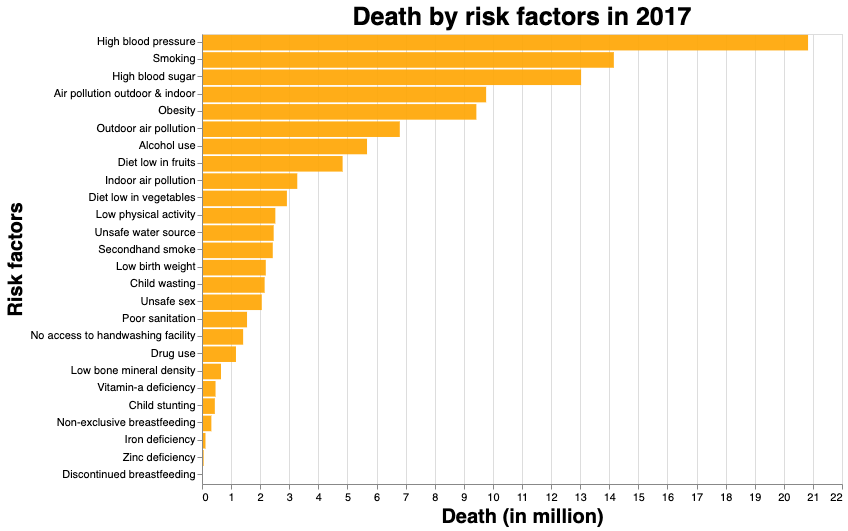

In [51]:
bar_chart 

In [52]:
bar_chart.save('bar_chart.html')